## Task 2: Image Manipulation using Matplotlib Library


### Step 2-1:

Let’s start to load a DKU Logo PNG image using the  Matplotlib Library.

**NOTE**: If want to use matplotlib in Jupyter Notebook, the same commands are available as you use in other IDE, but people commonly use following command prior to actual implementing matplotlib `%matplotlib inline`. This turns on inline plotting, where plot graphics will appear in your notebook. It really cool!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#image = plt.imread('path/to/DKU_Logo.png', format='png')
image = plt.imread('DKU_Logo.png', format='png')
print(type(image))
print(image.shape)
print("The min value of this image is:", image.min(), "and the max value of this image is:", image.max())

<class 'numpy.ndarray'>
(512, 512, 3)
The min value of this image is: 0.0 and the max value of this image is: 1.0


Executing this should produce a matrix (in numpy array format) with a shape of 512 x 512 x 3. Feel free to search numpy array online.

The matrix is a 3D array where the first two dimensions specify the pixel location in the image, and the third dimension contains three values for each pixel, corresponding to its Red, Green, and Blue intensity levels, specifically,
- 512 x 512: These values correspond to the image’s height (512 pixels) and width (512 pixels). Each pixel represents a point in the image.
- 3: This represents the number of color channels. Here, 3 indicates an RGB image where each pixel has three color components: Red, Green, and Blue.

The intensity values of each channel typically range between:
- [0, 255] for integer arrays if the image is 8-bit per channel.
- [0, 1] for higher color bits, represented using floating-point arrays.

**NOTE**: Teaching yourself some basic knowledge about numpy arrays from online sources will help you complete this project.

### Step 2-2

Display the obtained DKU Logo image inline with the Jupyter Notebook can be performed via:

Text(0.5, 1.0, 'DKU Logo (orginal version)')

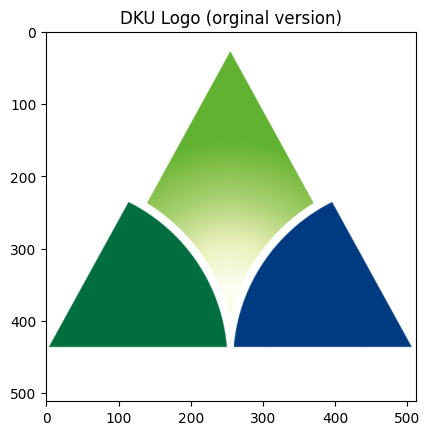

In [ ]:
plt.imshow(image)
plt.title("DKU Logo (orginal version)")

### Step 2-3

To access the RGB values of the pixel at row 256, column 256:

In [ ]:
value_r = image[256, 256, 0]
value_g = image[256, 256, 1]
value_b = image[256, 256, 2]
print([value_r, value_g, value_b])
print([float(value_r), float(value_g), float(value_b)])
print([np.float32(float(value_r)), np.float32(float(value_r)), np.float32(float(value_r))])

[np.float32(0.77254903), np.float32(0.87058824), np.float32(0.5647059)]
[0.772549033164978, 0.8705882430076599, 0.5647059082984924]
[np.float32(0.77254903), np.float32(0.77254903), np.float32(0.77254903)]


**NOTE:** The type of the `value_r`, `value_g`, and `value_b` is `np.float32`, represeting is a numpy 32-bit floating number type. You can convert the `np.float` to regular float number using `float(value_r)`, or convert float number to numpy float using `np.float32(float(value_r))`

### Step 2-4

Let me show a quick example of how to manipulate each pixel's value. Insteading of showing original DKU Logo, let’s turn it into a black and white image. One way to do this is to change the color of each pixel to be the average of its `rgb` value. So, for example if the pixel at location (10,23) has `rgb` value (0,100,200), we can calculate the mean (=100) of three values, and assign this pixel’s `rgb` value to (100,100,100). 

**Note** If we keep the each number of the `rgb` value the same this will ensure that only colors in the black and white range will show up. In the RGB color model, colors are represented by different intensities of red, green, and blue components. If these components are equal, the resulting color is a shade of gray, ranging from black (0, 0, 0) to white (255, 255, 255).

Text(0.5, 1.0, 'DKU Logo (Black and White version)')

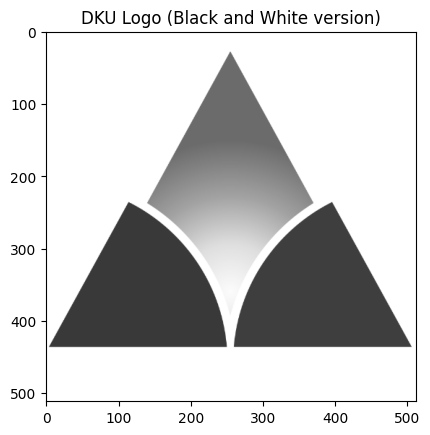

In [ ]:
# creating an all-zero numpy array with the shape of (512, 512, 3)
image_bw = np.zeros([512, 512, 3])

for i in range(512):
	for j in range(512):
		r,g,b = image[i, j, :]
		average = np.float32((r+g+b)/3)
		image_bw[i, j, 0] = average
		image_bw[i, j, 1] = average
		image_bw[i, j, 2] = average

plt.imshow(image_bw)
plt.title("DKU Logo (Black and White version)")

### Step 2-5

You are required to manipulate a given image in three sequential steps:
<ol>
<li> Flip the image vertically by reversing the order of the rows.
<li> Flip the vertically flipped image horizontally by reversing the order of the columns.
<li> Blur the resulting image using an averaging method.
</ol>

**Blurring Algorithm**:

One way to blur an image is by averaging the pixel values within a local neighborhood. Specifically, you will apply a 7×7 averaging process to each pixel in the image. The new value of each pixel (e.g., the red pixel) will be computed as the mean of all 49 pixels within a 7×7 square centered on the given pixel (as show in the picture). This operation will be performed independently for each color channel (Red, Green, and Blue).

<img src='image_blur_pixel_distance.png' style='width: 450px; margin-right: 15px'>

**Hint:**
- Each color channel (Red, Green, and Blue) will be processed separately, meaning the averaging will be applied to each channel individually rather than merging them as in grayscale conversion.
- Edge pixels (near image borders, e.g., green pixel in above picture) should be handled appropriately use zero padding techniques. As showing the below figure, zero padding is a technique used in image processing to expand the size of an image by adding extra pixels filled with zeros. As such, our 7×7 localized averaging calculation can be applied to pixels near the top/bottom/left/right edges. For a 512×512×3 RGB image, we need a padding size of at least 3 pixels (half of 7×7). You can create a new empty image, larger than the original, with a shape of (512 + 6, 512 + 6, 3), and apply our averaging calculation only to the central 512×512×3 image. After the everaging, extract the central 512×512×3 part of the processed image.

<img src='image_padding.png' style='width: 450px; margin-right: 15px'>

**Implementation Instructions**

Write a function called `image_manipulate (image)` that takes the DKU Logo image (a NumPy array of shape (512, 512, 3)) as input, and write three sub functions:
- `image_verflip(image)` → Flips the image vertically.
- `image_horflip(image)` → Flips the image horizontally.
- `image_blur(image)` → Applies a 7×7 averaging blur.

Returns the final manipulated image, preserving the original shape (512 × 512 × 3). Once manupulated, show the image in Jupyter Notebook with the name `DKU Logo (manipulated version)`.

Text(0.5, 1.0, 'DKU Logo (manupulated version)')

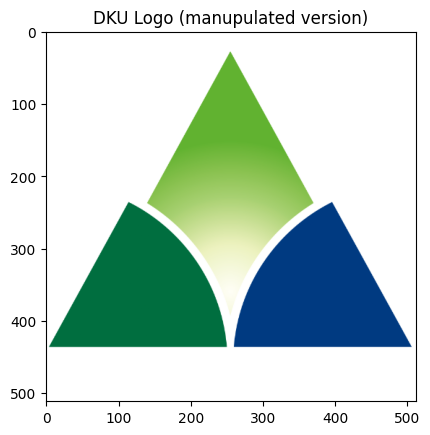

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def image_manupulate(image):
    def image_verflip(image):
        # YOUR CODE HERE
        ### BEGIN SOLUTION

        ### END SOLUTION
        return image
    
    def image_horflip(image):
        # YOUR CODE HERE
        ### BEGIN SOLUTION

        ### END SOLUTION
        return image
    
    def image_blur(image):
        # YOUR CODE HERE
        ### BEGIN SOLUTION

        ### END SOLUTION
        return image

    image_manupulated = image_blur(image_horflip(image_verflip(image)))
    return image_manupulated

image = plt.imread('DKU_Logo.png', format='png')
image_manupulated = image_manupulate(image)
plt.imshow(image_manupulated)
plt.title("DKU Logo (manupulated version)")